In [18]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

import os
print(os.listdir("../input"))

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)


['heart.csv']


On s'intéresse au dataset "Heart Disease UCI" disponible sur Kaggle dans les données de la compétition correspondante. Le jeu de données contient 14 variables et on s'intéresse à la variable "target". Il s'agit d'une variable binaire indiquant la présence ou non d'une maladie cardiaque chez le patient. On commence d'abord par charger les données, chercher s'il y a des valeurs manquantes et représenter les histogrammes de nos variables.  

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Aucune valeur manquante n'a été détectée.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


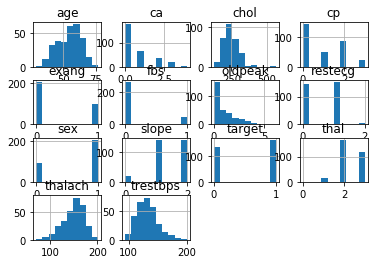

In [19]:
data = pd.read_csv('../input/heart.csv')
columns = data.columns
print(columns)

# Count Nan values in each column 
nan_values = pd.isna(data).sum()
if nan_values.sum() == 0:
    print("Aucune valeur manquante n'a été détectée.")    
data.hist()
data
    


L'objectif du projet est de créer un modèle suffisamment bon pour prédire si le patient est en effet atteint ou non d'une maladie cardiaque. Avant de s'intéresser à l'apprentissage, on doit d'abord analyser les variables. 

On commence d'abord par regarder la correlation entre les variables.

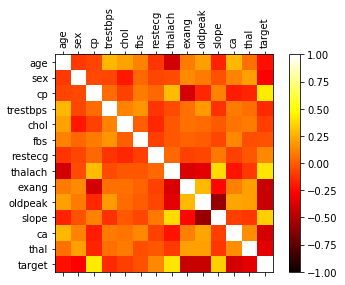

In [20]:
correlation = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation,cmap='hot', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()


On remarque que la variable "target" est positivement corrélée avec les variables *cp*, *restecg*, *thalach* et *slope*. Elle est négativement corrélée avec les variables *exang*, *oldpeak* et *ca*. Pour réaliser l'apprentissage dans le but de classifier les données, on va uniquement travailler avec les sept variables explicatives précédentes. 

Toujours pour le prétraitement des données, les variables vont être centrées réduites. On peut réaliser une analyse en composantes principales (ACP) mais on va se contenter de travailler avec les variables qu'on a. 

In [21]:
X = data.drop(columns = ['target'])
y = data[['target']].astype("category")
X = StandardScaler().fit_transform(X)


X = data[['cp','slope','restecg','thalach','exang','oldpeak','ca']]
X


,cp,slope,restecg,thalach,exang,oldpeak,ca
0,3,0,0,150,0,2.3,0
1,2,0,1,187,0,3.5,0
2,1,2,0,172,0,1.4,0
3,1,2,1,178,0,0.8,0
4,0,2,1,163,1,0.6,0
5,0,1,1,148,0,0.4,0
6,1,1,0,153,0,1.3,0
7,1,2,1,173,0,0.0,0
8,2,2,1,162,0,0.5,0
9,2,2,1,174,0,1.6,0


On sépare la base de données en jeu d'entraînement et jeu de tests. On souhaite réaliser une régression logistique et utiliser un perceptron multicouches et ensuite faire une comparaison entre les deux méthodes.  

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)
logistic_regressor = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
y_pred = logistic_regressor.predict(X_test)
matrice_confusion = confusion_matrix(y_test, y_pred)
taux = sum(np.diag(matrice_confusion))/sum(sum(matrice_confusion))
print(matrice_confusion)
print(taux)
print('\n')

[[36 11]
 [ 7 47]]
0.8217821782178217




Maintenant, on applique le PMC. Les paramètres du PMC à savoir le pas d'apprentissage et le nombre de couches cachées sont choisis de façon arbitraire.

In [23]:
mlp = MLPClassifier(solver='lbfgs', alpha=0.01, hidden_layer_sizes=(5, ), max_iter = 100)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

In [24]:
matrice_confusion = confusion_matrix(y_test, y_pred)
taux = sum(np.diag(matrice_confusion))/sum(sum(matrice_confusion))
print(matrice_confusion)
print(taux)

[[ 0 47]
 [ 0 54]]
0.5346534653465347


On doit maintenant trouver les paramètres optimaux pour avoir le modèle le plus adapté à la base de données ainsi qu'à l'application. On définit donc un espace de paramètres sur lesquels on souhaite tester l'optimalité du perceptron multicouches et on affiche les meilleurs paramètres à utiliser. Par la suite, on utilise encore une fois un perceptron multicouches en prenant en compte cette fois-ci les nouveaux paramètres. 

In [25]:
parameter_space = {
    'hidden_layer_sizes': [(5,), (10,), (7,)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

print('Best parameters found:\n', clf.best_params_)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10,)}
0.703 (+/-0.224) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (5,)}
0.713 (+/-0.245) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10,)}
0.550 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (7,)}
0.550 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (5,)}
0.624 (+/-0.215) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (10,)}
0.703 (+/-0.224) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (7,)}
0.550 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (5,)}
0.550 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (10,)}
0.550 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (7,)}
0.644 (+/-0.271) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (5,)}
0.698 (+/-0.208) for {'ac

In [26]:
mlp = MLPClassifier(solver='lbfgs', alpha=0.0001, hidden_layer_sizes=(10, ), activation = 'relu')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
matrice_confusion = confusion_matrix(y_test, y_pred)
taux = sum(np.diag(matrice_confusion))/sum(sum(matrice_confusion))
print(matrice_confusion)
print(taux)

[[37 10]
 [ 7 47]]
0.8316831683168316


Comme on pouvait s'y attendre, le taux de succès est meilleur que celui obtenu précédemment. 

On peut aussi voir que le taux de succès avec le PMC est meilleur que celui obtenu avec le régresseur logistique. Il est important de préciser qu'on ne peut jamais affirmer qu'un modèle est mieux qu'un autre que si on définit une application et un contexte d'études. Dans le cas présent, on peut dire que notre jeu de données et notre application s'adapte mieux à un PMC qu'à un regresseur logistique. 